<a href="https://colab.research.google.com/github/Angorith/acorn_python/blob/main/0720_50%EC%9D%BC%EC%B0%A8_Ensemble%5BVoting(hard_Voting%2C_Soft_Voting)%2C_Bagging%5D%2CRandomForestClassifier%5Bcancer%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

human_activity : local computer에서 실행

#앙상블 학습

앙상블 학습 : 여러개의 분류기를 사용하여 예측값을 얻은 다음, 그 예측값을 평균하여 분류 하는 방법

앙상블 학습 방법 : voting, bagging, boosting, stacking

#보팅(Voting)과 배깅(Bagging)

보팅과 배깅의 다른점은 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행에 보팅을 수행하는 것입니다.

Ensemble Learning : 여러개의 분류기를 생성, 예측을 결합하여 정확한 예측을 도출하는 기법

Ensemble 종류 : Voting, Bagging, Boosting, Stacking

Voting : 하나의 data set에 대해 다른 종류의 분류기를 설정 후, 분류기들의 예측값 중 제일 많이 나온 클래스로 결정하거나(hard voting) , 클래스 확률을 평균냈을 때 제일 높은 확률의 클래스를 선택(소프트 보팅)하는 방식으로 분류(선형 회귀, KNN, SVM)

Bagging : 분류기는 모두 같은 알고리즘이지만 dataset을 다르게 추출하여 수행 후,  voting 하여 클래스 결정

Boosting : 여러개의 약한 분류기가 순차적으로 학습하는데, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바를게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행 (GBM -> XGBoost -> LightGBM)

Stacking : 다른 모델의 예측 결과값을 다시; 락습 데이터로 만들어서 다른 모델로 재학습 시켜 결과를 얻는 방법

Bosting 방식 : GBM

약한 분류기 = 리프노드 2개만 있는 분류기

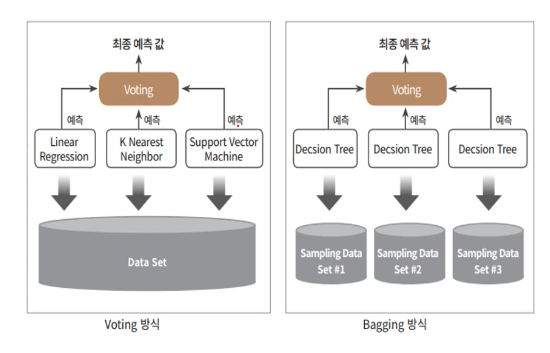

보팅은 하드 보팅과 소프트 보팅으로 나누어 집니다.

하드 보팅(Hard Voting) 과 소프트 보팅(Soft Voting) 하드 보팅의 경우 각 분류기가 예측한 결과를 다수결로 최종 class로 결정하는 방식이고, 소프트 보팅의 경우 각 분류기가 예측한 확률을 평균하여 결정하는 방식입니다.

일반적으로는 하드 보팅보다는 소프트 보팅이 예측 성능이 상대적으로 우수하여 주로 사용됩니다. 사이킷런은 VotingClassifier 클래스를 통해 보팅을 지원합니다.

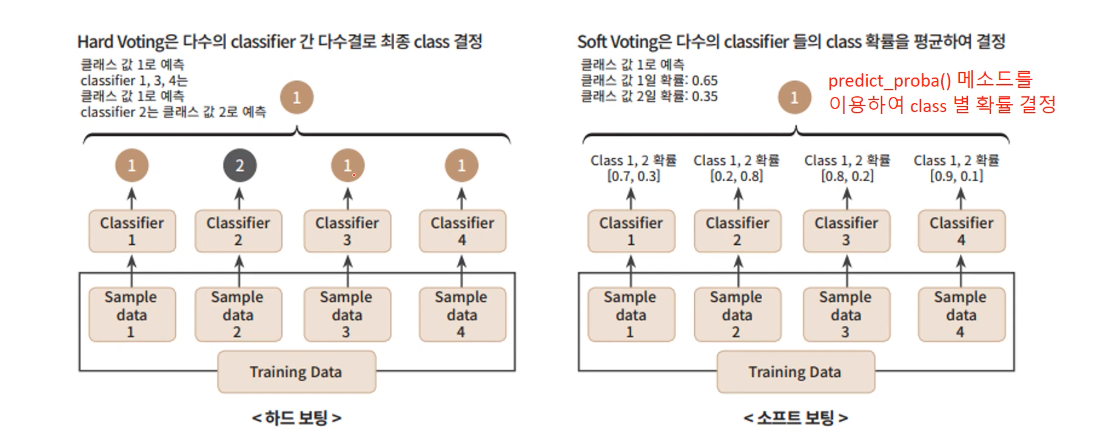

<파이썬 머신러닝 완벽 가이드, 권철민, 위키북스>

sampling이란 ? : 데이터를 어떤곳에 사용할 수 있도록 준비시키는 것

1. 분류
  
    최종 결과 = 0,1,2,3,4,5,6
    
    정답지 = 0,1,2,3,4,5,6
    
    정확도: 최종결과 == 정답지

2. 회귀

    최종 결과 = 2243, 18.9, 67.5

    정답지 = 2243, 19, 68

    정확도 = O , X , X

    mae = 평균 (ㅣ y_i - y_hat l ) 

    mse = 평균 ( y_i - y_hat)**2

    RMSE = 조사



In [1]:
import pandas as pd
from sklearn.ensemble import VotingClassifier

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.datasets  import load_breast_cancer

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
cancer = load_breast_cancer()

In [6]:
df = pd.DataFrame(cancer.data, columns= cancer.feature_names)

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

In [20]:
lr_clf = LogisticRegression(max_iter=5000)

In [21]:
knn_clf = KNeighborsClassifier(n_neighbors=8)#데이터가 들어가면 주변 클래스를 평가, 평가된 클래스로 값을 준다

In [22]:
vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN', knn_clf)], voting='soft')#esimators는 tuple형태로 써준다

In [23]:
vo_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=5000)),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [24]:
pred = vo_clf.predict(X_test)

In [25]:
accuracy_score(y_test, pred)

0.9473684210526315

In [26]:
classifiers = [lr_clf, knn_clf]

In [27]:
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  print(classifier.__class__.__name__)  #classifier 이름을 출력
  print(accuracy_score(y_test, pred))

LogisticRegression
0.9649122807017544
KNeighborsClassifier
0.9385964912280702


#RandomForest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

In [38]:
rf_clf = RandomForestClassifier(random_state=156)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 :{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도 :0.9474


In [31]:
from sklearn.model_selection import GridSearchCV

In [39]:
params = {
    'n_estimators' : [100, 200, 300],
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [8, 16, 20]
}

In [41]:
rf_clf = RandomForestClassifier(random_state=156)

In [42]:
grid_tree = GridSearchCV(rf_clf, param_grid=params, cv=3, refit=True)
grid_tree.fit(X_train, y_train)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)
em = grid_tree.best_estimator_
pred = em.predict(X_test)
accuracy_score(y_test, pred)

best parameters :  {'max_depth': 6, 'min_samples_split': 8, 'n_estimators': 200}
best score :  0.9626757290577438


0.9473684210526315

In [43]:
ftr_importacnce_values = em.feature_importances_

In [44]:
ftr_importacnce_values

array([0.04135274, 0.01542065, 0.04371807, 0.06367626, 0.00482862,
       0.01307489, 0.03788437, 0.10537907, 0.00256515, 0.0028043 ,
       0.01587443, 0.00361196, 0.01322284, 0.04033493, 0.00288637,
       0.00273424, 0.00489419, 0.00367928, 0.00227882, 0.00398866,
       0.13531486, 0.01102072, 0.13720021, 0.08437237, 0.01123357,
       0.01306796, 0.03127412, 0.1327837 , 0.01198579, 0.00753689])

In [45]:
ftr_importacnce = pd.Series(ftr_importacnce_values, index = cancer.feature_names)

In [50]:
ftr_importacnce.sort_values(ascending=False)[:10]

worst perimeter         0.137200
worst radius            0.135315
worst concave points    0.132784
mean concave points     0.105379
worst area              0.084372
mean area               0.063676
mean perimeter          0.043718
mean radius             0.041353
area error              0.040335
mean concavity          0.037884
dtype: float64

In [52]:
ftr_10 = ftr_importacnce.sort_values(ascending=False)[:10]

In [48]:
import seaborn as sns

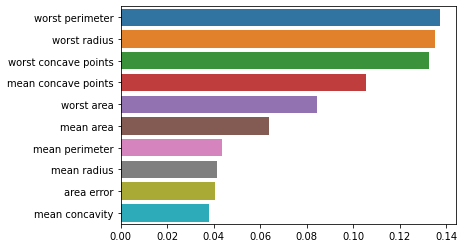

In [53]:
sns.barplot(x=ftr_10, y= ftr_10.index)

In [54]:
!cp drive/MyDrive/otto_train.csv .

In [55]:
df = pd.read_csv('./otto_train.csv')

In [56]:
df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [57]:
df.tail()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9
61877,61878,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Class_9


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

In [60]:
df.isnull().sum().sum()

0

In [61]:
df.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000
